In [116]:
# import 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import numpy as np
import scipy
import seaborn as sns

# pathfile
combined_pathfile = "../combined_df.csv"

#read CSV
combined_df = pd.read_csv(combined_pathfile)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_x             965 non-null    int64  
 1   week_x             965 non-null    int64  
 2   home_team_x        965 non-null    object 
 3   away_team_x        965 non-null    object 
 4   winner             965 non-null    object 
 5   tie                3 non-null      object 
 6   day                965 non-null    object 
 7   date               965 non-null    object 
 8   time               965 non-null    object 
 9   pts_win            965 non-null    int64  
 10  pts_loss           965 non-null    int64  
 11  yds_win            965 non-null    int64  
 12  turnovers_win      965 non-null    int64  
 13  yds_loss           965 non-null    int64  
 14  turnovers_loss     965 non-null    int64  
 15  home_team_name     965 non-null    object 
 16  home_team_city_x   965 non

In [117]:
# look at data
combined_df.head(10)

,year_x,week_x,home_team_x,away_team_x,winner,tie,day,date,time,pts_win,...,gametime_local,home_team_y,away_team_y,home_score,away_score,OT_flag,arrests,division_game,DateTime,hour
0,2011,1,Green Bay Packers,New Orleans Saints,Green Bay Packers,NaN,Thu,September 8,8:40PM,42,...,7:30:00 PM,Green Bay,New Orleans,42,34,NaN,8.0,n,2011-09-08 19:30:00,19
1,2011,1,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,NaN,Sun,September 11,1:05PM,35,...,1:05:00 PM,Baltimore,Pittsburgh,35,7,NaN,1.0,y,2011-09-11 13:05:00,13
2,2011,1,Houston Texans,Indianapolis Colts,Houston Texans,NaN,Sun,September 11,1:05PM,34,...,12:00:00 PM,Houston,Indianapolis,34,7,NaN,2.0,y,2011-09-11 12:00:00,12
3,2011,1,Jacksonville Jaguars,Tennessee Titans,Jacksonville Jaguars,NaN,Sun,September 11,1:05PM,16,...,1:00:00 PM,Jacksonville,Tennessee,16,14,NaN,4.0,y,2011-09-11 13:00:00,13
4,2011,1,Chicago Bears,Atlanta Falcons,Chicago Bears,NaN,Sun,September 11,1:06PM,30,...,12:00:00 PM,Chicago,Atlanta,30,12,NaN,1.0,n,2011-09-11 12:00:00,12
5,2011,1,Kansas City Chiefs,Buffalo Bills,Buffalo Bills,NaN,Sun,September 11,1:06PM,41,...,12:00:00 PM,Kansas City,Buffalo,7,41,NaN,0.0,n,2011-09-11 12:00:00,12
6,2011,1,Tampa Bay Buccaneers,Detroit Lions,Detroit Lions,NaN,Sun,September 11,1:06PM,27,...,1:00:00 PM,Tampa Bay,Detroit,20,27,NaN,0.0,n,2011-09-11 13:00:00,13
7,2011,1,Arizona Cardinals,Carolina Panthers,Arizona Cardinals,NaN,Sun,September 11,4:15PM,28,...,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n,2011-09-11 13:15:00,13
8,2011,1,San Diego Chargers,Minnesota Vikings,San Diego Chargers,NaN,Sun,September 11,4:20PM,24,...,1:15:00 PM,San Diego,Minnesota,24,17,NaN,15.0,n,2011-09-11 13:15:00,13
9,2011,1,San Francisco 49ers,Seattle Seahawks,San Francisco 49ers,NaN,Sun,September 11,4:22PM,33,...,1:15:00 PM,San Francisco,Seattle,33,17,NaN,3.0,y,2011-09-11 13:15:00,13


In [118]:
# Create filtered dataframe with only pertinent information
filtered_df = combined_df[['year_x','date','home_team_x','away_team_x','home_score','away_score','winner','weekly_attendance',
                           'arrests','team_name']]
# test for effect
filtered_df.head()

,year_x,date,home_team_x,away_team_x,home_score,away_score,winner,weekly_attendance,arrests,team_name
0,2011,September 8,Green Bay Packers,New Orleans Saints,42,34,Green Bay Packers,70555.0,8.0,Packers
1,2011,September 11,Baltimore Ravens,Pittsburgh Steelers,35,7,Baltimore Ravens,71434.0,1.0,Ravens
2,2011,September 11,Houston Texans,Indianapolis Colts,34,7,Houston Texans,71444.0,2.0,Texans
3,2011,September 11,Jacksonville Jaguars,Tennessee Titans,16,14,Jacksonville Jaguars,61619.0,4.0,Jaguars
4,2011,September 11,Chicago Bears,Atlanta Falcons,30,12,Chicago Bears,62115.0,1.0,Bears


In [119]:
# replace arrest NaN values with 0s
filtered_df['arrests'] = filtered_df['arrests'].fillna(0)

# test for effect
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year_x             965 non-null    int64  
 1   date               965 non-null    object 
 2   home_team_x        965 non-null    object 
 3   away_team_x        965 non-null    object 
 4   home_score         965 non-null    int64  
 5   away_score         965 non-null    int64  
 6   winner             965 non-null    object 
 7   weekly_attendance  965 non-null    float64
 8   arrests            965 non-null    float64
 9   team_name          965 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 75.5+ KB


C:\Users\eman_\AppData\Local\Temp\ipykernel_16980\1640956753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['arrests'] = filtered_df['arrests'].fillna(0)


In [120]:
# create and fill new column showing percentage arrested
filtered_df['%_arrested'] = filtered_df['arrests']/filtered_df['weekly_attendance']*100

C:\Users\eman_\AppData\Local\Temp\ipykernel_16980\3688341273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['%_arrested'] = filtered_df['arrests']/filtered_df['weekly_attendance']*100


In [121]:
# make new column showing homefield advantage based on conditions
# credit for base code https://www.statology.org/compare-two-columns-in-pandas/
#define conditions
conditions = [filtered_df['home_team_x'] == filtered_df['winner'], 
              filtered_df['away_team_x'] == filtered_df['winner']]

#define choices
choices = ['Yes', 'No']

#create new column in DataFrame that displays results of comparisons
filtered_df['home_advantage'] = np.select(conditions, choices, default='Tie')

C:\Users\eman_\AppData\Local\Temp\ipykernel_16980\287182915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['home_advantage'] = np.select(conditions, choices, default='Tie')


In [122]:
# create and fill new column for score gap
# credit for base code https://numpy.org/doc/stable/reference/generated/numpy.where.html
HA = filtered_df['home_score'] - filtered_df['away_score']
AH = filtered_df['away_score'] - filtered_df['home_score']                                            
filtered_df['score_gap'] = np.where(HA < 0, AH, HA)

# reorganize columns
filtered_df = filtered_df.reindex(columns=['year_x', 'date', 'home_team_x', 'away_team_x','home_score','away_score',
                                           'score_gap','winner','home_advantage','weekly_attendance','arrests','%_arrested','team_name'])

C:\Users\eman_\AppData\Local\Temp\ipykernel_16980\883037999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['score_gap'] = np.where(HA < 0, AH, HA)


In [123]:
# test results so far
filtered_df.head(20)

,year_x,date,home_team_x,away_team_x,home_score,away_score,score_gap,winner,home_advantage,weekly_attendance,arrests,%_arrested,team_name
0,2011,September 8,Green Bay Packers,New Orleans Saints,42,34,8,Green Bay Packers,Yes,70555.0,8.0,0.011339,Packers
1,2011,September 11,Baltimore Ravens,Pittsburgh Steelers,35,7,28,Baltimore Ravens,Yes,71434.0,1.0,0.001400,Ravens
2,2011,September 11,Houston Texans,Indianapolis Colts,34,7,27,Houston Texans,Yes,71444.0,2.0,0.002799,Texans
3,2011,September 11,Jacksonville Jaguars,Tennessee Titans,16,14,2,Jacksonville Jaguars,Yes,61619.0,4.0,0.006492,Jaguars
4,2011,September 11,Chicago Bears,Atlanta Falcons,30,12,18,Chicago Bears,Yes,62115.0,1.0,0.001610,Bears
5,2011,September 11,Kansas City Chiefs,Buffalo Bills,7,41,34,Buffalo Bills,No,68755.0,0.0,0.000000,Chiefs
6,2011,September 11,Tampa Bay Buccaneers,Detroit Lions,20,27,7,Detroit Lions,No,51274.0,0.0,0.000000,Buccaneers
7,2011,September 11,Arizona Cardinals,Carolina Panthers,28,21,7,Arizona Cardinals,Yes,60627.0,5.0,0.008247,Cardinals
8,2011,September 11,San Diego Chargers,Minnesota Vikings,24,17,7,San Diego Chargers,Yes,66716.0,15.0,0.022483,Chargers
9,2011,September 11,San Francisco 49ers,Seattle Seahawks,33,17,16,San Francisco 49ers,Yes,69732.0,3.0,0.004302,49ers


C:\ProgramData\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


The correlation of score gap in a game to the number of arrests that day is -0.052864223082118994. There is very little correlaton to having a bigger gap in score and increased number of arrests.


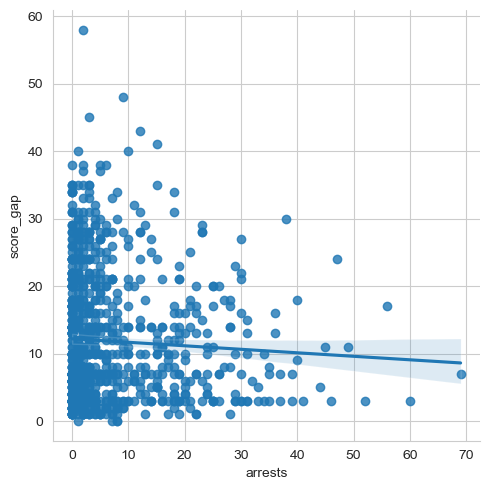

In [135]:
# Are there any correlation between score gap and total number of arrests on that game day
sns.lmplot(x="arrests", y="score_gap", data=filtered_df);

#add correlation coefficient to plot
filtered_df['score_gap'].corr(filtered_df['arrests'])

print(f"The correlation of score gap in a game to the number of arrests that day is {filtered_df['score_gap'].corr(filtered_df['arrests'])}. There is very little correlaton to having a bigger gap in score and increased number of arrests.")

In [125]:
filtered_df.head()

,year_x,date,home_team_x,away_team_x,home_score,away_score,score_gap,winner,home_advantage,weekly_attendance,arrests,%_arrested,team_name
0,2011,September 8,Green Bay Packers,New Orleans Saints,42,34,8,Green Bay Packers,Yes,70555.0,8.0,0.011339,Packers
1,2011,September 11,Baltimore Ravens,Pittsburgh Steelers,35,7,28,Baltimore Ravens,Yes,71434.0,1.0,0.001400,Ravens
2,2011,September 11,Houston Texans,Indianapolis Colts,34,7,27,Houston Texans,Yes,71444.0,2.0,0.002799,Texans
3,2011,September 11,Jacksonville Jaguars,Tennessee Titans,16,14,2,Jacksonville Jaguars,Yes,61619.0,4.0,0.006492,Jaguars
4,2011,September 11,Chicago Bears,Atlanta Falcons,30,12,18,Chicago Bears,Yes,62115.0,1.0,0.001610,Bears


In [126]:
# make and fill new columns for Home Wins/ Home Losses
filtered_df['home_wins'] = filtered_df.home_team_x == filtered_df.winner
filtered_df['home_loss'] = filtered_df.home_team_x != filtered_df.winner
win_perc = filtered_df.groupby('home_team_x').home_wins.sum()/ filtered_df.home_team_x.value_counts()*100
win_perc = win_perc.sort_values(ascending=False)
loss_perc = filtered_df.groupby('home_team_x').home_loss.sum()/ filtered_df.home_team_x.value_counts()*100
loss_perc = loss_perc.sort_values(ascending=True)
filtered_df.head(15)

,year_x,date,home_team_x,away_team_x,home_score,away_score,score_gap,winner,home_advantage,weekly_attendance,arrests,%_arrested,team_name,home_wins,home_loss
0,2011,September 8,Green Bay Packers,New Orleans Saints,42,34,8,Green Bay Packers,Yes,70555.0,8.0,0.011339,Packers,True,False
1,2011,September 11,Baltimore Ravens,Pittsburgh Steelers,35,7,28,Baltimore Ravens,Yes,71434.0,1.0,0.001400,Ravens,True,False
2,2011,September 11,Houston Texans,Indianapolis Colts,34,7,27,Houston Texans,Yes,71444.0,2.0,0.002799,Texans,True,False
3,2011,September 11,Jacksonville Jaguars,Tennessee Titans,16,14,2,Jacksonville Jaguars,Yes,61619.0,4.0,0.006492,Jaguars,True,False
4,2011,September 11,Chicago Bears,Atlanta Falcons,30,12,18,Chicago Bears,Yes,62115.0,1.0,0.001610,Bears,True,False
5,2011,September 11,Kansas City Chiefs,Buffalo Bills,7,41,34,Buffalo Bills,No,68755.0,0.0,0.000000,Chiefs,False,True
6,2011,September 11,Tampa Bay Buccaneers,Detroit Lions,20,27,7,Detroit Lions,No,51274.0,0.0,0.000000,Buccaneers,False,True
7,2011,September 11,Arizona Cardinals,Carolina Panthers,28,21,7,Arizona Cardinals,Yes,60627.0,5.0,0.008247,Cardinals,True,False
8,2011,September 11,San Diego Chargers,Minnesota Vikings,24,17,7,San Diego Chargers,Yes,66716.0,15.0,0.022483,Chargers,True,False
9,2011,September 11,San Francisco 49ers,Seattle Seahawks,33,17,16,San Francisco 49ers,Yes,69732.0,3.0,0.004302,49ers,True,False


In [127]:
# save win/loss percentages to varibales
w=win_perc
l=loss_perc

In [128]:
win_perc.head()

home_team_x
New England Patriots    87.5
Green Bay Packers       80.0
Seattle Seahawks        77.5
Denver Broncos          77.5
Arizona Cardinals       72.5
dtype: float64

In [129]:
w.corr

<bound method Series.corr of home_team_x
New England Patriots    87.500000
Green Bay Packers       80.000000
Seattle Seahawks        77.500000
Denver Broncos          77.500000
Arizona Cardinals       72.500000
Pittsburgh Steelers     72.500000
Baltimore Ravens        70.967742
Cincinnati Bengals      70.000000
San Francisco 49ers     70.000000
Carolina Panthers       62.500000
Indianapolis Colts      62.500000
New York Jets           56.410256
Houston Texans          55.000000
Chicago Bears           53.125000
San Diego Chargers      52.500000
Miami Dolphins          51.612903
Kansas City Chiefs      51.282051
New York Giants         50.000000
Dallas Cowboys          47.500000
Philadelphia Eagles     45.000000
Washington Redskins     45.000000
Oakland Raiders         37.837838
Tennessee Titans        35.000000
Jacksonville Jaguars    32.432432
Tampa Bay Buccaneers    30.769231
dtype: float64>

In [133]:
l.corr

<bound method Series.corr of home_team_x
New England Patriots    12.500000
Green Bay Packers       20.000000
Seattle Seahawks        22.500000
Denver Broncos          22.500000
Arizona Cardinals       27.500000
Pittsburgh Steelers     27.500000
Baltimore Ravens        29.032258
Cincinnati Bengals      30.000000
San Francisco 49ers     30.000000
Carolina Panthers       37.500000
Indianapolis Colts      37.500000
New York Jets           43.589744
Houston Texans          45.000000
Chicago Bears           46.875000
San Diego Chargers      47.500000
Miami Dolphins          48.387097
Kansas City Chiefs      48.717949
New York Giants         50.000000
Dallas Cowboys          52.500000
Philadelphia Eagles     55.000000
Washington Redskins     55.000000
Oakland Raiders         62.162162
Tennessee Titans        65.000000
Jacksonville Jaguars    67.567568
Tampa Bay Buccaneers    69.230769
dtype: float64>

In [130]:
# plt.subplot(1,2)
# # x = np.arange(len(filtered_df))
# plt.barh(win_perc.index, win_perc.values, color='tab:Green', label='Win')
# plt.barh(loss_perc.index, loss_perc, color='Red', label='Loss')
# plt.xlabel("Percent")
# plt.ylabel("Teams")
# plt.title("Percent of Home Games Won/Lost")
# sns.despine(bottom=True)

# ax.tick_params(bottom=False, left=True)
# plt.yticks(fontsize=15,)
# plt.legend(frameon=False, fontsize=15)
# plt.show()


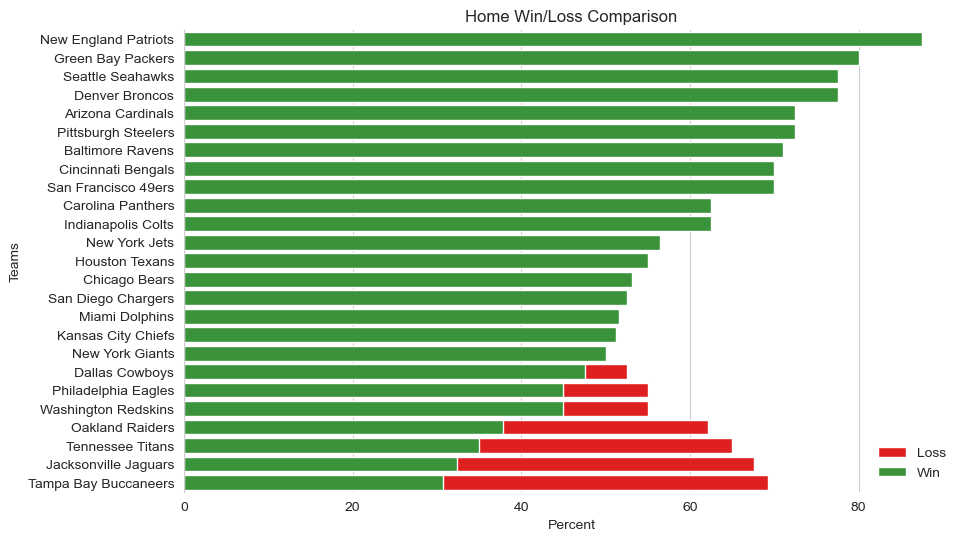

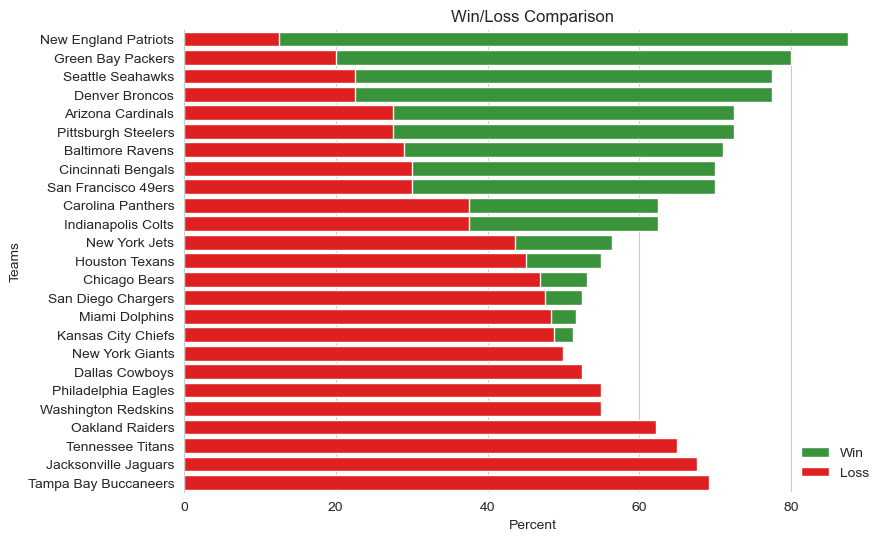

The correlation of Home Wins to Home Losses is -1.0. There is no correlaton to having homefield advantage and winning.


In [131]:
#  How strong is home field advantage (correlation between home team and home team wins)
fig, ax = plt.subplots(figsize=(10, 6))
# Plot for the first graph (Win Percentage)
# Plot for the second graph (Loss Percentage)
sns.barplot(y=loss_perc.index, x=loss_perc.values, color='red', label='Loss', ax=ax)
sns.barplot(y=win_perc.index, x=win_perc.values, color='tab:green', label='Win', ax=ax)
ax.set_xlabel("Percent")
ax.set_ylabel("Teams")
ax.set_title("Home Win/Loss Comparison")
ax.legend(frameon=False)
sns.despine(bottom=True)
sns.set_style("whitegrid")
plt.show()

fig, ax = plt.subplots(figsize=(9,6))
# Plot for the first graph (Win Percentage)
sns.barplot(y=win_perc.index, x=win_perc.values, color='tab:green', label='Win', ax=ax)
# Plot for the second graph (Loss Percentage)
sns.barplot(y=loss_perc.index, x=loss_perc.values, color='red', label='Loss', ax=ax)
ax.set_xlabel("Percent")
ax.set_ylabel("Teams")
ax.set_title("Win/Loss Comparison")
ax.legend(frameon=False)
sns.despine(bottom=True)
sns.set_style("whitegrid")
plt.show()

lw_corr = l.corr(w)
print(f"The correlation of Home Wins to Home Losses is {lw_corr}. There is no correlaton to having homefield advantage and winning.")